# Análisis Exploratorio y Regresión Lineal
Stefano Aragoni & Carol Arévalo

## Importar las librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/wq/gs7vpwkj7k31lw9njy09srjw0000gn/T/ipykernel_2188/2695924018.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Parte 1
### 1.1. Haga una exploración rápida de sus datos para eso haga un resumen de su dataset.

El conjunto de datos proporcionado contiene información sobre juegos de béisbol. Las columnas incluyen:

In [2]:
data = pd.read_csv("baseball_reference_2016_scrape.csv")
pd.set_option('display.max_columns', None)

# Obtener los nombres de las columnas
data.columns.values.tolist()

['attendance',
 'away_team',
 'away_team_errors',
 'away_team_hits',
 'away_team_runs',
 'boxscore_url',
 'date',
 'field_type',
 'game_duration',
 'game_type',
 'home_team',
 'home_team_errors',
 'home_team_hits',
 'home_team_runs',
 'other_info_string',
 'start_time',
 'venue']

Lo que estas columnas nos dicen es que se está almacenando información de cada partido individual. Se almacena información como el equipo local y visitante, la cantidad de errores, hits y runs por equipo, la fecha, el tipo de estadio, duración de juego, hora de inicio, entre otras cosas. 

Asimismo, a continuación se presenta la cantidad de columas y filas del dataset.

In [3]:
#Obtener el número de filas y columnas
print(data.shape)

(2463, 17)


A continuación se presenta el resumen de las columnas mencionadas. Se presenta información sobre la cantidad de entradas (no vacías) relacionadas a cada columna, así como el tipo de información que almacena.

In [4]:
# Obtener información general sobre el conjunto de data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attendance         2463 non-null   object 
 1   away_team          2463 non-null   object 
 2   away_team_errors   2463 non-null   int64  
 3   away_team_hits     2463 non-null   int64  
 4   away_team_runs     2463 non-null   int64  
 5   boxscore_url       2463 non-null   object 
 6   date               2463 non-null   object 
 7   field_type         0 non-null      float64
 8   game_duration      2463 non-null   object 
 9   game_type          2460 non-null   object 
 10  home_team          2463 non-null   object 
 11  home_team_errors   2463 non-null   int64  
 12  home_team_hits     2463 non-null   int64  
 13  home_team_runs     2463 non-null   int64  
 14  other_info_string  2463 non-null   object 
 15  start_time         2463 non-null   object 
 16  venue              2463 

Asimismo, se presenta un resumen estadístico de las columnas numéricas, que incluye promedio, desviación estándar, y otros datos.

In [5]:
# Obtener un resumen estadístico de las columnas numéricas
print(data.describe())

       away_team_errors  away_team_hits  away_team_runs  field_type  \
count       2463.000000     2463.000000     2463.000000         0.0   
mean           0.580593        8.764515        4.413723         NaN   
std            0.793391        3.511581        3.104556         NaN   
min            0.000000        1.000000        0.000000         NaN   
25%            0.000000        6.000000        2.000000         NaN   
50%            0.000000        8.000000        4.000000         NaN   
75%            1.000000       11.000000        6.000000         NaN   
max            5.000000       22.000000       21.000000         NaN   

       home_team_errors  home_team_hits  home_team_runs  
count       2463.000000     2463.000000     2463.000000  
mean           0.585871        8.611855        4.519691  
std            0.805542        3.436965        3.111572  
min            0.000000        0.000000        0.000000  
25%            0.000000        6.000000        2.000000  
50%         

Finalmente, a continuación se presentan los nombres de las respectivas columnas, así como los primeros 5 datos almacenados de cada columna en el dataset.

In [6]:
head = data.head()
print(head)

  attendance              away_team  away_team_errors  away_team_hits  \
0   40,030']          New York Mets                 1               7   
1   21,621']  Philadelphia Phillies                 0               5   
2   12,622']        Minnesota Twins                 0               5   
3   18,531']   Washington Nationals                 0               8   
4   18,572']       Colorado Rockies                 1               8   

   away_team_runs                                       boxscore_url  \
0               3  https://www.baseball-reference.com/boxes/KCA/K...   
1               2  https://www.baseball-reference.com/boxes/CIN/C...   
2               2  https://www.baseball-reference.com/boxes/BAL/B...   
3               3  https://www.baseball-reference.com/boxes/ATL/A...   
4               4  https://www.baseball-reference.com/boxes/ARI/A...   

                       date  field_type game_duration             game_type  \
0     Sunday, April 3, 2016         NaN        : 

__________
### 1.2 Diga el tipo de cada una de las variables del dataset (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)

![TIPOS VARIABLE](image1.png "Tipos Variable")


_________
### 1.3. Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.

En este caso, el dataset contaba con varios errores de formato. Por tal razón, antes de hacer los gráficos exploratorios, se realizó una limpieza inicial con el propósito de poder tener más control sobre los datos. Asimismo, esto era importante ya que algunos datos numéricos estaban almacenados como "strings", por tal razón era importante modificar el tipo de dato para poder hacer el respectivo análisis.

#### Limpieza Inicial

In [7]:
#Limpiar datos

# formato hora
def to_time(start_time):
    start_time = start_time.replace("Start Time: ", "")
    start_time = start_time.replace(":", " ")
    hour, minute, period, local = [x.strip() for x in start_time.split(" ")]
    hour = int(hour)
    minute = int(minute)
    if period == "p.m." and hour != 12:
        hour += 12
    elif period == "a.m." and hour == 12:
        hour = 0
    return datetime.time(hour, minute)


#Attendance a integer
data['attendance'] = data['attendance'].str.strip("']").str.replace(',','')
data = data[pd.to_numeric(data['attendance'], errors='coerce').notnull()]
data['attendance'] = pd.to_numeric(data['attendance'])

#Quitar columnas que no aportan información
data.dropna(axis=1, how='all', inplace=True) #todas columasn vacias
data.drop(['other_info_string'], axis=1, inplace=True) #vacia
data.drop(['boxscore_url'], axis=1, inplace=True) #url no aporta info

#Pasar duracion a minutos
data['game_duration'] = data['game_duration'].str.replace(':','').astype(int)
data['game_duration'] = data['game_duration'].apply(lambda x: x/100*60 + x%100)

#Quitar los : de la columna venue
data['venue'] = data['venue'].str.replace(':','')

#cambiar tipo de dato de la fecha
data['date'] = pd.to_datetime(data['date'])

#pasar a fecha 0/0/0 a dia de semana int
data['date'] = data['date'].apply(lambda x: x.weekday())

#cambiar formato de la hora
data['start_time'] = data['start_time'].apply(to_time)

#pasar hora de 00:00:00 a solo hora
data['start_time'] = data['start_time'].apply(lambda x: x.hour)

data.to_csv("modificada.csv", index=False)

#exploarar nuevos datos
data = pd.read_csv("modificada.csv")
print(explore(data, method="summarize"))


                   dtypes  count  null_sum  null_pct  nunique  \
attendance          int64   2460         0       0.0     2374   
away_team          object   2460         0       0.0       30   
away_team_errors    int64   2460         0       0.0        6   
away_team_hits      int64   2460         0       0.0       22   
away_team_runs      int64   2460         0       0.0       20   
date                int64   2460         0       0.0        7   
game_duration     float64   2460         0       0.0      168   
game_type          object   2460         0       0.0        4   
home_team          object   2460         0       0.0       30   
home_team_errors    int64   2460         0       0.0        6   
home_team_hits      int64   2460         0       0.0       23   
home_team_runs      int64   2460         0       0.0       18   
start_time          int64   2460         0       0.0       11   
venue              object   2460         0       0.0       31   

                        

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/quickda/explore_data.py:27: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/quickda/explore_data.py:28: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/quickda/explore_data.py:29: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#### Gráficos Exploratorios

Como primer paso de los gráficos exploratorios, se ejcutó el comando de eda_num de QuickDa para poder obtener gráficas de diferentes columnas. Esto a través de obtener histogramas, así como diagramas de caja y bigotes. A continuación se presenta los resultados.

Las siguientes gráficas indican la distribución de los datos así como la cantidad de ciertos datos de cada variable. En el caso de la asistencia, la mayoría de juegos tienen entre 23,000 a 38,000 espectadores. Por otro lado, los días de la semana están bien distribuídos, ya que casi todos los días hay una cantidad similar de juegos (excepto los jueves). FInalmente, la gráfica y diamgrama de hora de inicio indican que casi todos los juegos inician a las 7pm; esto viendose reflejado en la media del diagrama de caja y bigotes. 

Outlier Analysis - Boxplot


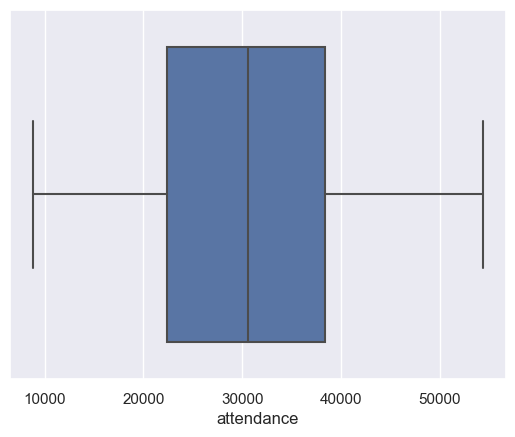

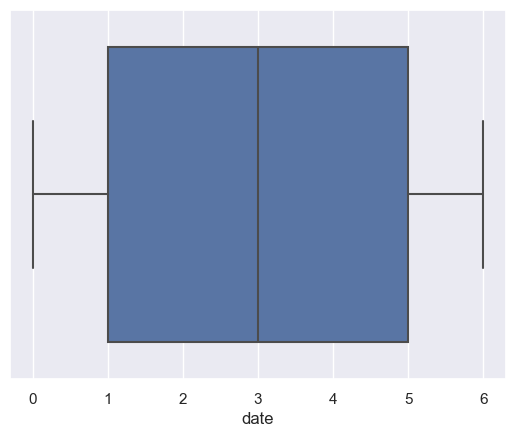

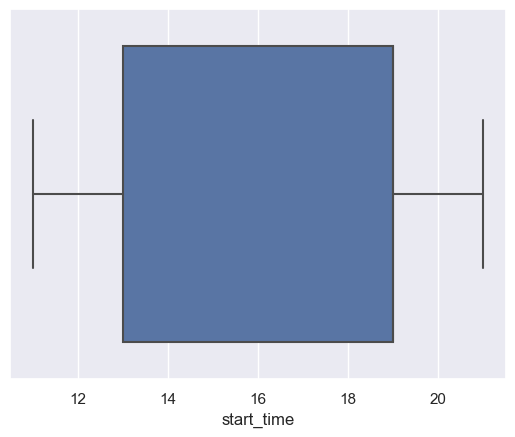

Distribution Analysis - Histogram


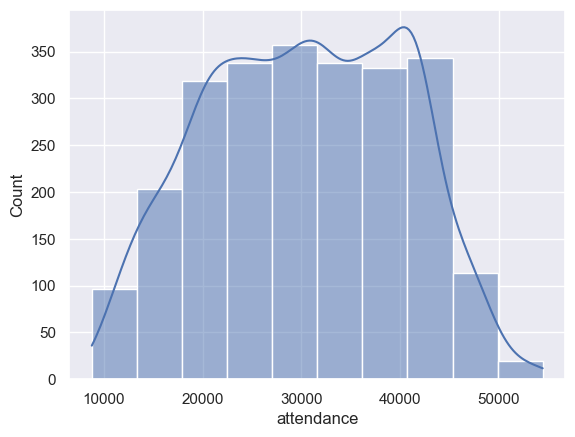

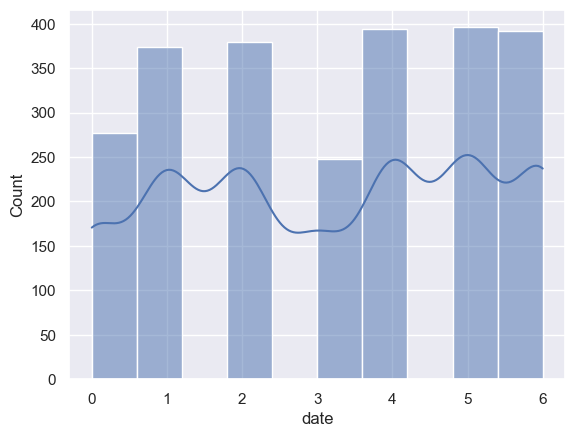

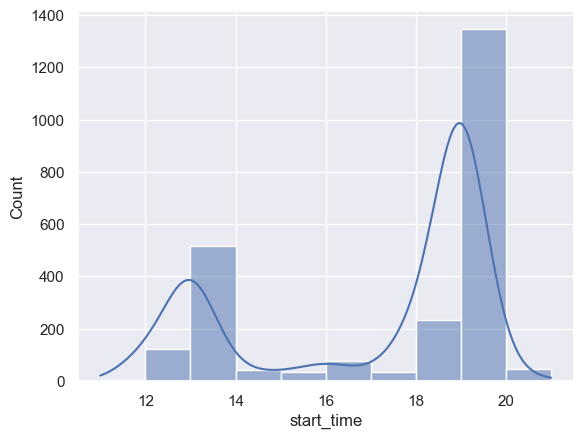

In [8]:
#eda_num
from copy import deepcopy
dataTemp = deepcopy(data)

columns = ['attendance', 'date', 'start_time']
dataTemp = dataTemp[columns]

eda_num(dataTemp)

Posteriormente, se hizo una gráfica que busca determinar relación entre la asistencia de un juego y el tipo de juego. En este caso, somo se puede observar en la siguiente imagen, los juegos con más asistencia son aquellos realizados durante el día. 

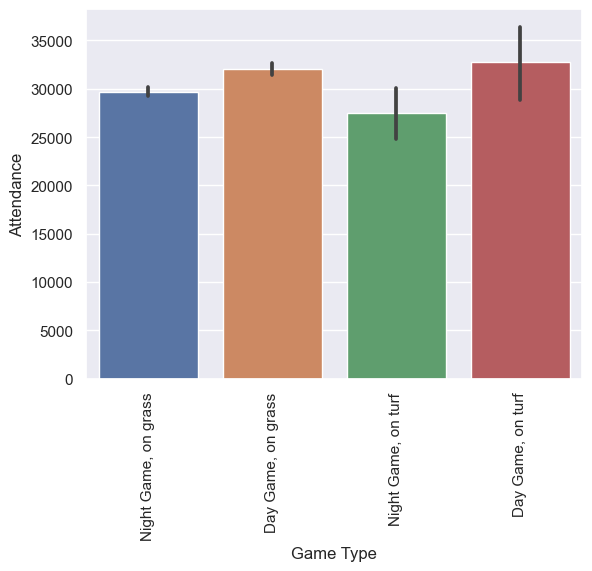

In [9]:
# Attendance vs game tye
sns.barplot(x="game_type", y="attendance", data=data)
plt.xlabel("Game Type")
plt.ylabel("Attendance")
plt.xticks(rotation=90)
plt.show()

Sin embargo, cabe destacar que los juegos durante la noche en grama son los más comunes. Como se puede observar a continuación. Por tal razón, sería más útil para el modelo de regresión lineal analizar un juego de este tipo, ya que tiene más información para entrenarse. 

<AxesSubplot: xlabel='game_type', ylabel='count'>

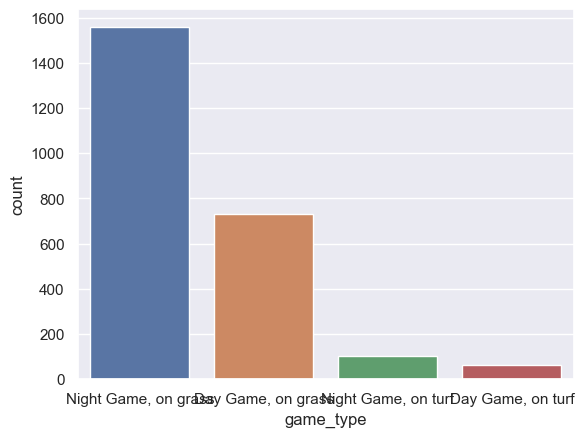

In [10]:
sns.countplot(x = 'game_type', data = data)

La siguiente gráfica busca determinar qué equipo obtiene la mayor cantidad de asistencia como equipo local. Esto es sumamente importante, ya que permite determinar los equipos más populares y conocidos.

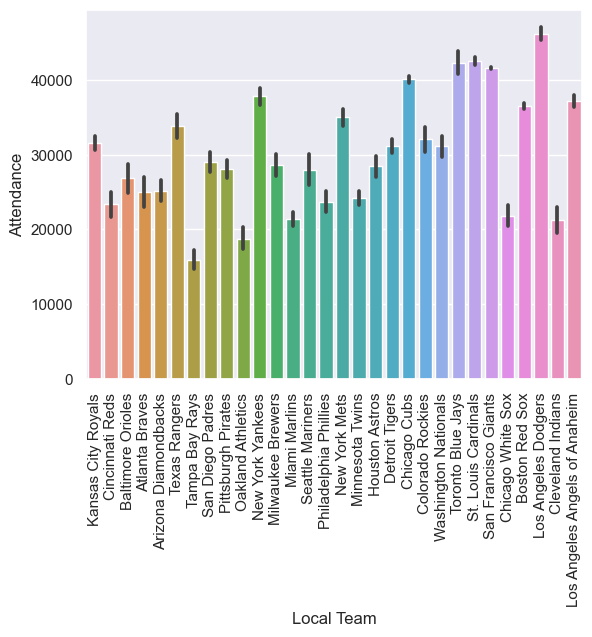

In [11]:
#Attendance vs local team
sns.barplot(x="home_team", y="attendance", data=data)
plt.xlabel("Local Team")
plt.ylabel("Attendance")
plt.xticks(rotation=90)
plt.show()

A continuación se realizó lo mismo con análisis pero con equipos visitantes. En este caso, sin embargo, la mayoría de equipos visitantes tienen una asistencia bastante similar. Esto posiblemente se debe a que no tienen sus fans locales apoyandolos en cualquier lado que vayan, así resultando en que las asistencias sean bastante similar.

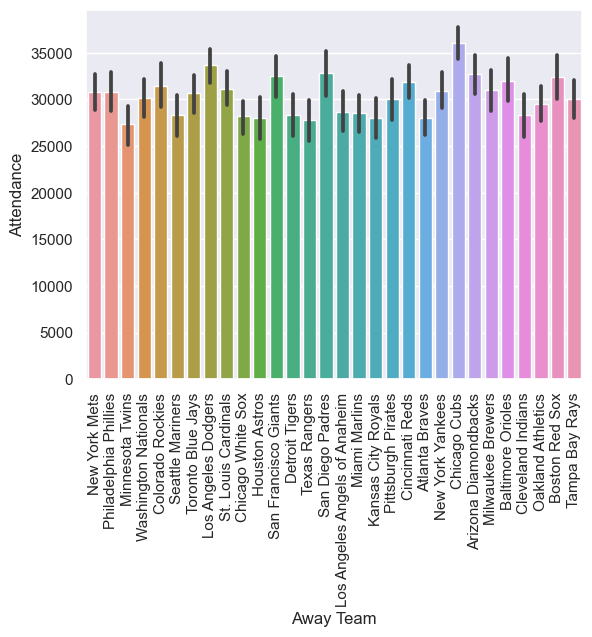

In [12]:
#Attendance vs away team
sns.barplot(x="away_team", y="attendance", data=data)
plt.xlabel("Away Team")
plt.ylabel("Attendance")
plt.xticks(rotation=90)
plt.show()

En la siguiente gráfica se demuestra la cantidad de partidos jugados por los equipos locales. En este caso, se puede observar como los Cleveland Indians y Chicago Clubs son los equipos que más juegos han jugado localmente. Esto siendo muy interesante, ya que como home team, los Cleveland Indians suelen tener muy baja asistencia. Los Chicago Clubs, sin embargo, tienen más asistencia promedio. 

<AxesSubplot: xlabel='count', ylabel='home_team'>

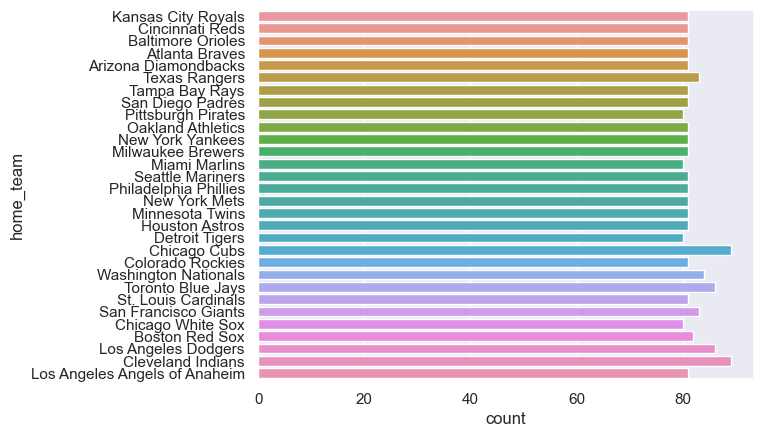

In [13]:
#Most common home team
sns.countplot(y = 'home_team', data = data)

A continuación, se replicó la grafica anterior con Away Team. En este caso, los Chicago Clubs son el equipo que más juegos han particiado en como equipo visitante. Asimismo, los Los Angeles Dodgers también tienen una cantidad similar de partidos jugados. Al comparar estos datos con la asistencia promedio de Away Teams, nos podemos dar cuenta que estos dos equipos tienen la mayor asistencia promedio también. Esto conlleva a la conslusión que estos equipos son muy buenos, juegan bastantes partidos, y son amados por los fans del baseball.

<AxesSubplot: xlabel='count', ylabel='away_team'>

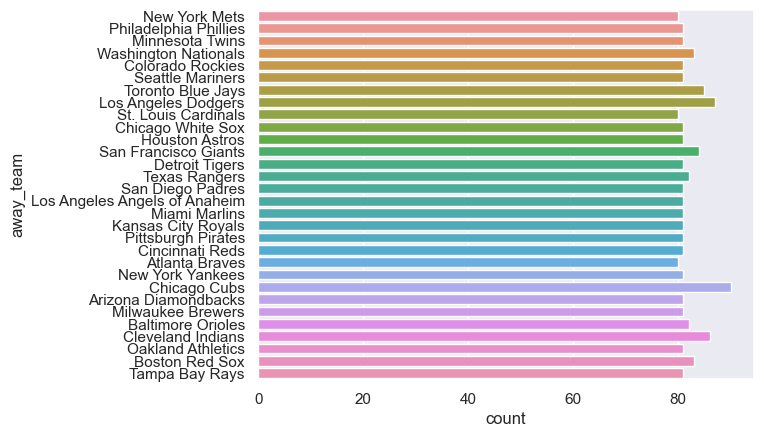

In [14]:
#Most common away team
sns.countplot(y = 'away_team', data = data)

También se quiso comparar se quiso comparar cómo se relaciona la presencia de 2 equipos específicos con la asistencia. Para esto, se determinó los equipos que se han enfrentado (una o más veces) y se calculó la asistencia promedio de las veces que estos equipos han jugado.

En base a esto, se pudo determinar que los Los Angeles Dodgers son capaces de tener una asistencia consistente sin importar contra quién están jugando. Otros equipos consistentes son los Toronto Blue Jays y Boston Red Socks. 


<AxesSubplot: xlabel='attendance', ylabel='Match'>

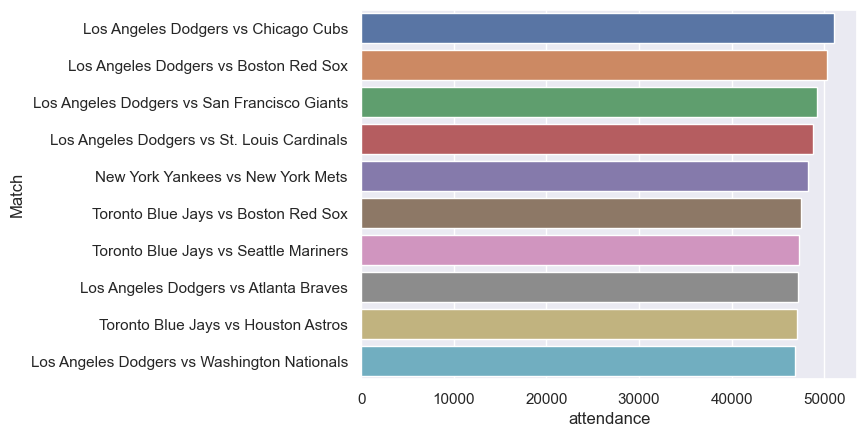

In [15]:
# Group the data by home team and calculate the mean attendance
teams = data.groupby(["home_team", "away_team"]).agg({'attendance': 'mean'}).reset_index()

#sort by attendance
teams = teams.sort_values(by='attendance', ascending=False)

# join the home team and away team columns
teams['Match'] = teams['home_team'] + ' vs ' + teams['away_team']

# plot the top 10 teams
sns.barplot(x="attendance", y="Match", data=teams.head(10))

Cabe destacar que también se quería determinar cómo ciertas variables interactuaban entre sí. Por tal motivo, se optó por realizar una multi-gráfica de dispersión para demostrar cómo todas las variables se relacionan entre sí. 

Como se puede ver a continuación, home_team_hits y home_team_runs así como away_team_hits y away_team_runs tienen una relación muy clara. Mientras más haya de una variable, más hay de la otra. 

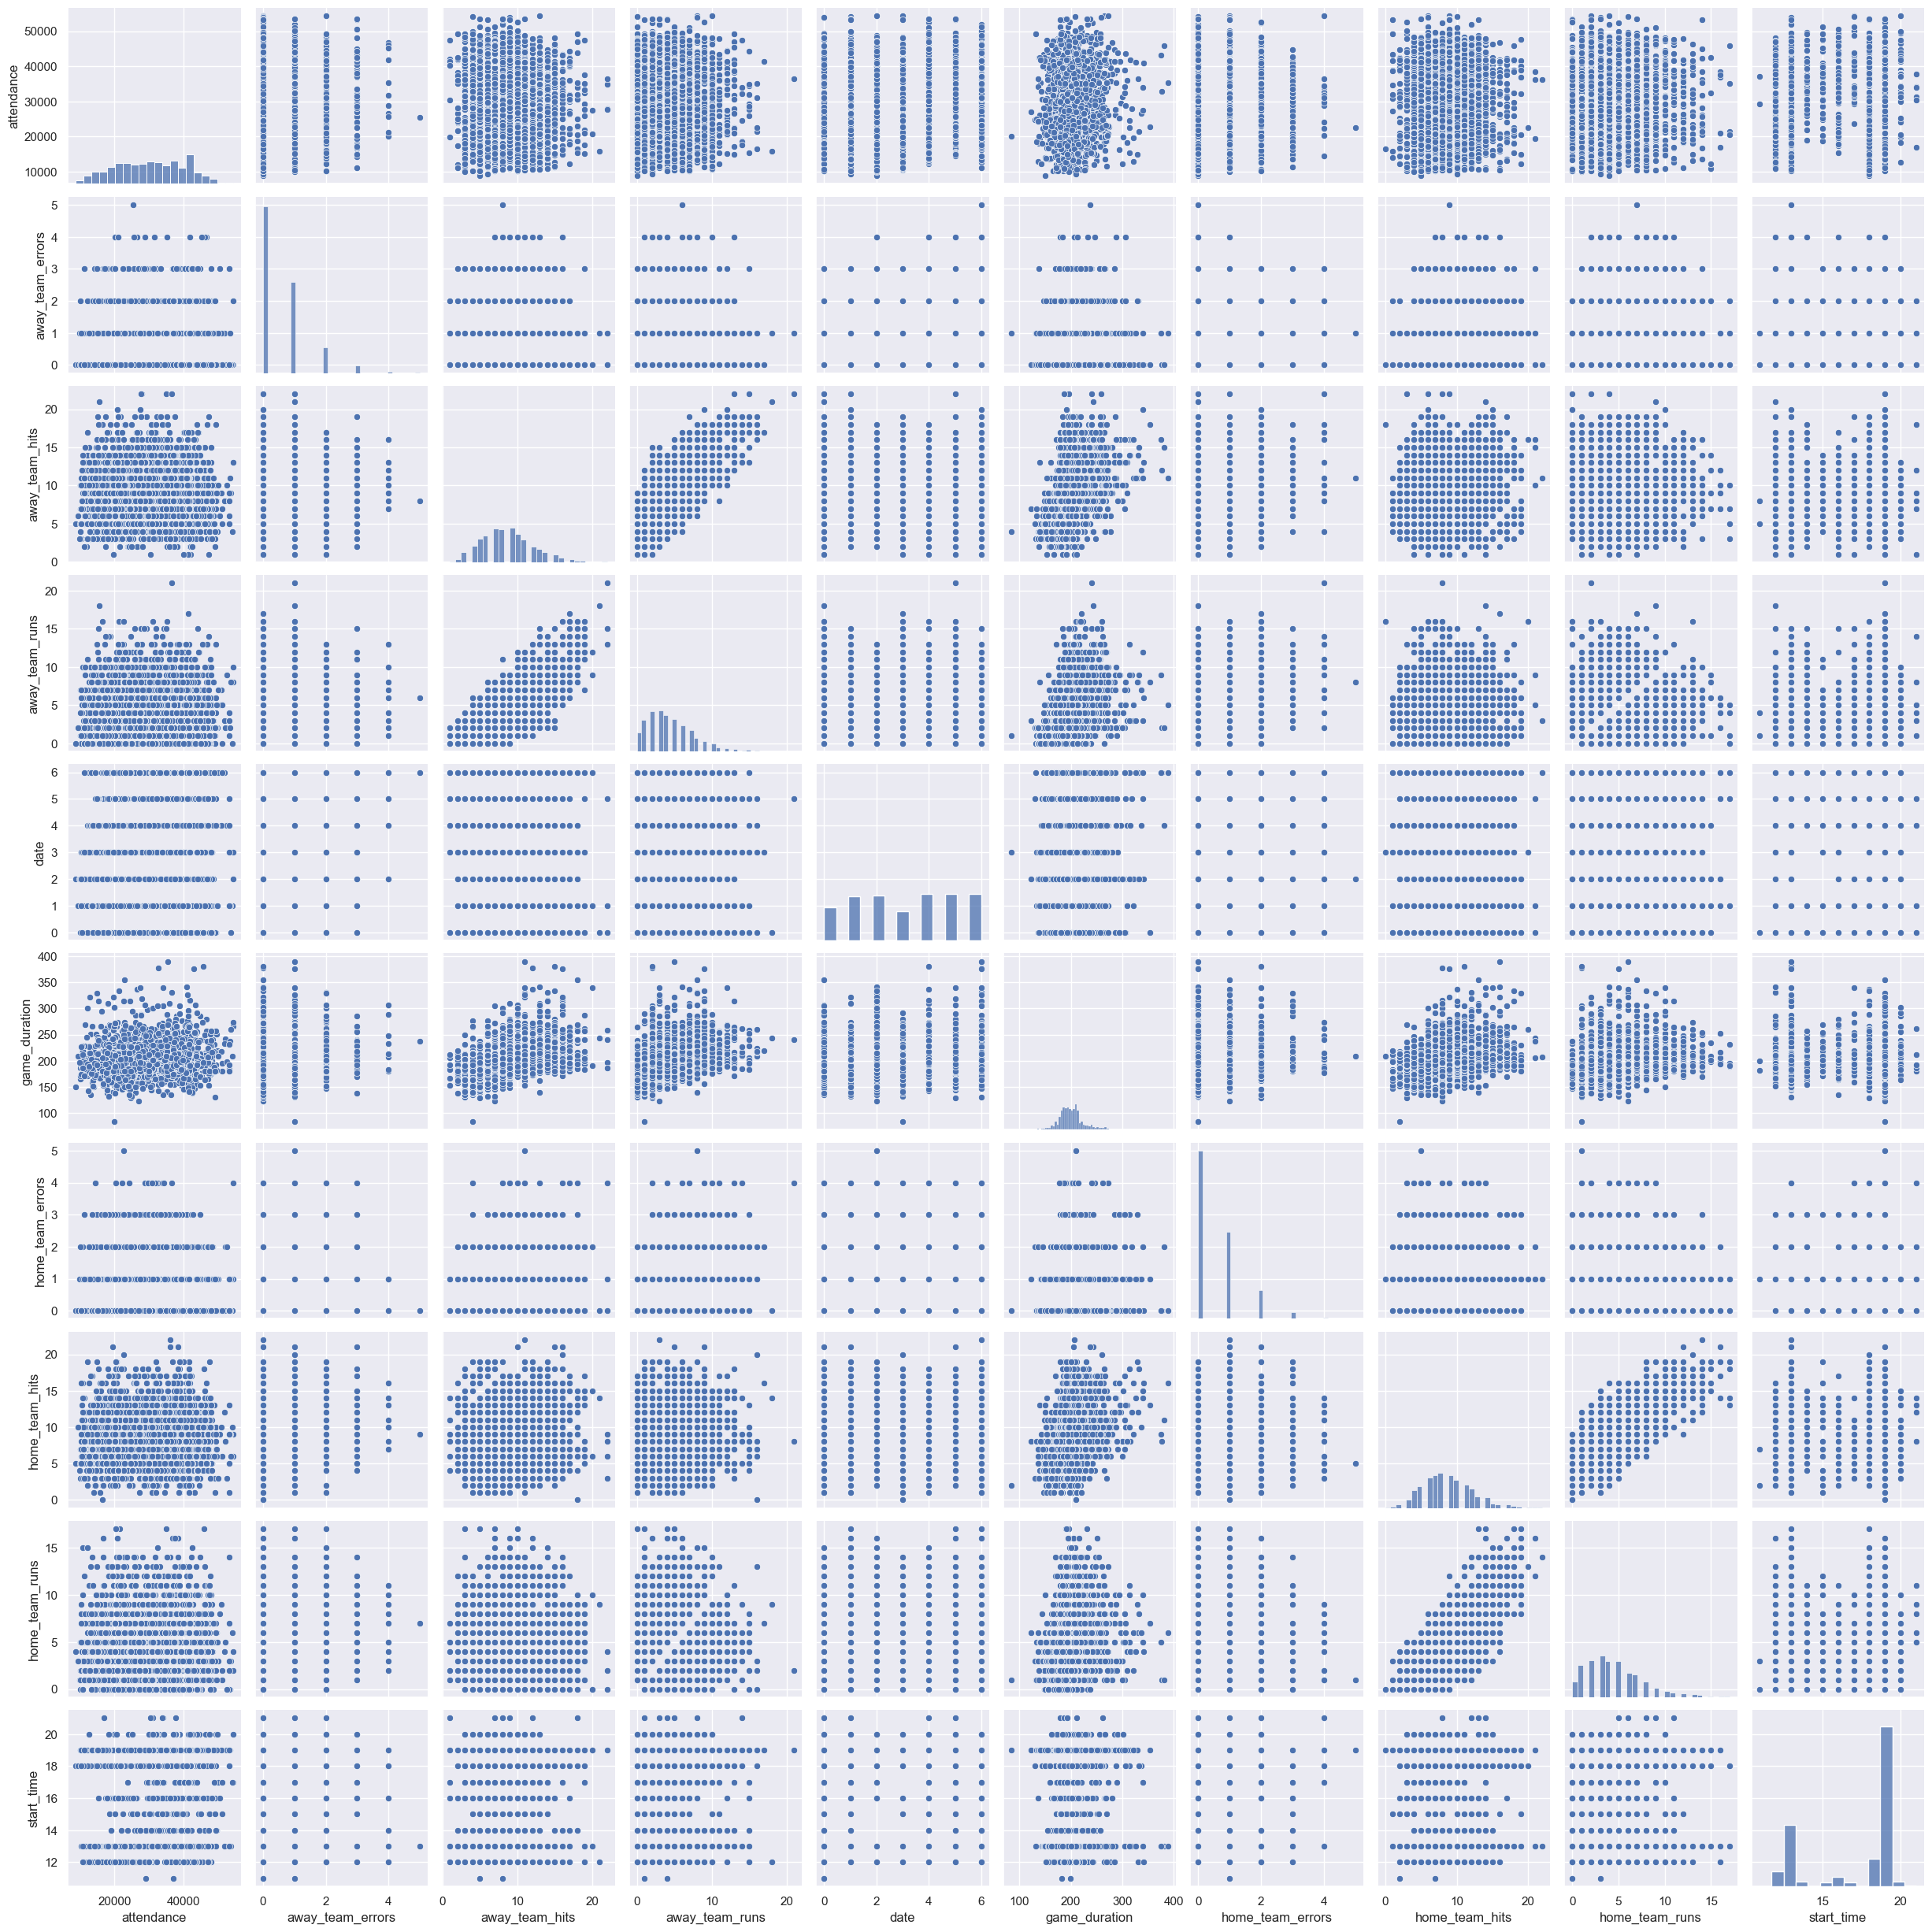

In [16]:
sns.pairplot(data)

__________
### 1.4. Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.

A continuación, como se puede observar, se separaron las variables númericas de las categóricas. En base a esto, se creó una matriz de correlación para poder determinar el grado de correlación entre las mismas. 

En este caso, se puede observar una gran relación entre away_team_runs y away_team_hits. Esto debido a que si hacen hits, pueden ocurrir runs. Se vió el mismo patrón con home_team_runs y home_team_hits.

Por otro lado, otra correlación importante es la de game_duration y away_team_hits así como game_duration y away_team_hits. Posiblemente se debe a que el equipo visitante hace varios runs o hits, y después se necesita tiempo extra para que el equipo local intente retomar.

Una correlación muy interesante es la de away_team_errors y home_team_runs (y viceversa), así como away_team_errors y home_team_hits (y viceversa). Esto claramente indica que mientras más errores haga un equipo, más probabilidades tendrá el otro equipo de hacer runs y hits.

Finalmente, también se pudo observar una relación entre attendance y día de la semana. Esto posiblemente es el resultado de que más personas pueden ir a un partido un fin de semana, por ejemplo, a un jueves.


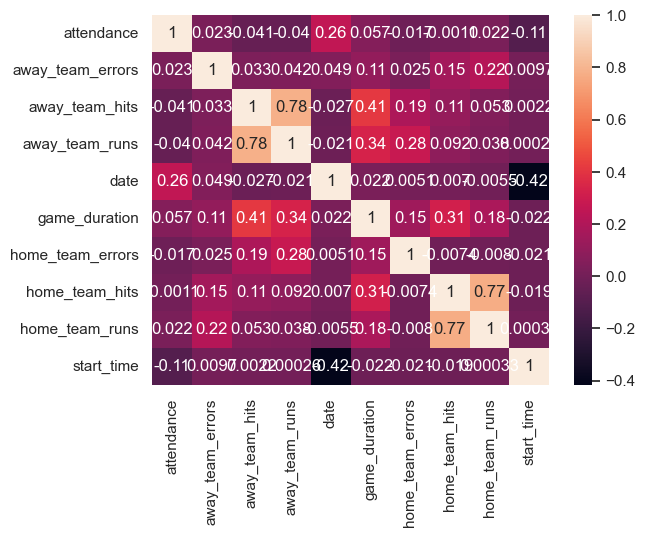

In [17]:
# separar las variables numéricas y categóricas
num_vars = data.select_dtypes(include=['int', 'float'])
cat_vars = data.select_dtypes(exclude=['int', 'float'])

# matriz de correlación númericas
sns.heatmap(num_vars.corr(), annot=True)
plt.show()

~Lo siguiente no era necesario, ni es parte de lo que pide la pregunta. sin embargo, se quería incluir esta gráfica en este espacio ya que es sobre correlaciones de variables.~

Por otro lado, se realizó un análisis de profiling de Pandas, el cual también permitió poder analizar la correlación entre ciertas variables categóricas y numéricas. En este caso, como se puede observar a continuación, tenemos una gran relación entre home_team y venue; esto como resultado de que los equipos locales normalmente suelen tener sus propios estadios o juegan en los mismos estados de su área. 

De igual manera, se puede observar una clara relación entre attendance y venue, así como attendance y home_team. Esto probablemente se debe a que más gente va a ver partidos en apoyo de su equipo local que a visitantes. 

Finalmente, también se pueden observar las correlaciones anteriormente expuestas en la matriz de correlación.

![CORRELACIÓN PANDAS](image2.png "Correlación Pandas")

In [18]:
#pandas profiling report
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_file("report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 127.16it/s]


___________
### 1.5. Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos

En este caso, como se puede ver a continuación, se optó por hacer tablas de frecuencia para las columnas de variables categóricas. A través de esto, se pudo determinar nuevamente que los Chicago Clubs, Cleveland Indians, Los Angeles Dodgers y Toronto Blue Jays son los equipos que más han jugado en partidos como equipos locales y visitantes. Asimismo, se pudo determinar que los juegos de noche en grama son más frecuentes; sin embargo, según la exploración anteriormente realizada... los juegos de día suelen tener más asistentes. 

Finalmente, en todos los venues se jugó casi la misma cantidad de veces; entre 81 y 89. Sin embargo, en Fort Bragg Park solamente se jugó una única vez; posiblemente fue un partido especial. La información de este partido se podría eliminar, ya que es atípico al resto.

In [19]:
categoricas = ['date','away_team','game_type','home_team','venue']

# tablas de frecuencia variables categoricas
for col in categoricas:
    print("\n****************************\n",col,"\t\tFrecuencia","\n****************************")
    print(data[col].value_counts())




****************************
 date 		Frecuencia 
****************************
5    396
4    394
6    392
2    379
1    374
0    277
3    248
Name: date, dtype: int64

****************************
 away_team 		Frecuencia 
****************************
Chicago Cubs                     90
Los Angeles Dodgers              87
Cleveland Indians                86
Toronto Blue Jays                85
San Francisco Giants             84
Boston Red Sox                   83
Washington Nationals             83
Baltimore Orioles                82
Texas Rangers                    82
Cincinnati Reds                  81
New York Yankees                 81
Los Angeles Angels of Anaheim    81
Arizona Diamondbacks             81
Milwaukee Brewers                81
Kansas City Royals               81
Oakland Athletics                81
Pittsburgh Pirates               81
Tampa Bay Rays                   81
Miami Marlins                    81
Philadelphia Phillies            81
San Diego Padres             

A continuación se presentan los mismos datos pero en tablas de proporcion.

In [20]:
#tabla de proporciones
for col in categoricas:
    print("\n****************************\n",col,"\t\tProporción","\n****************************")
    print(data[col].value_counts(normalize=True))


****************************
 date 		Proporción 
****************************
5    0.160976
4    0.160163
6    0.159350
2    0.154065
1    0.152033
0    0.112602
3    0.100813
Name: date, dtype: float64

****************************
 away_team 		Proporción 
****************************
Chicago Cubs                     0.036585
Los Angeles Dodgers              0.035366
Cleveland Indians                0.034959
Toronto Blue Jays                0.034553
San Francisco Giants             0.034146
Boston Red Sox                   0.033740
Washington Nationals             0.033740
Baltimore Orioles                0.033333
Texas Rangers                    0.033333
Cincinnati Reds                  0.032927
New York Yankees                 0.032927
Los Angeles Angels of Anaheim    0.032927
Arizona Diamondbacks             0.032927
Milwaukee Brewers                0.032927
Kansas City Royals               0.032927
Oakland Athletics                0.032927
Pittsburgh Pirates               0.03292

Asimismo, se quizo realizar diferentes gráficas de barras para poder visualizar de manera más fácil los resultados. 

En este caso, como primer punto, se quería comparar los datos de frecuencia de equipos de home y away. Para esto, se determinó los equipos únicos en el dataset. Posteriormente se calculó cuantos juegos jugaron de ambas maneras. Para finalizar, se convirtió la información en un dataset de pandas para poder graficarlo posteriormente.

Como se puede ver a continuación, los equipos jugaron una cantidad balanceada de juegos como away y home; ningún equipo jugó principalmente de una forma u otra. Los 4 equipos mencionados durante este análisis están presentes nuevamente como los equipos con más partidos.

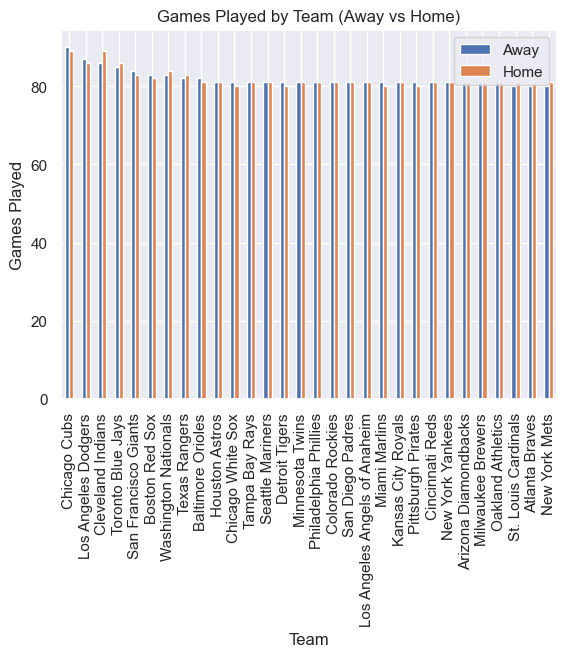

In [21]:
teams = data['away_team'].unique()
teams = teams.tolist()
teams = np.array(teams)
teams = np.reshape(teams, (len(teams), 1))
teams = np.append(teams, np.zeros((len(teams), 2)), axis=1)

#count games of each team
for i in range(len(teams)):
    teams[i][1] = len(data[data['away_team'] == teams[i][0]])
    teams[i][2] = len(data[data['home_team'] == teams[i][0]])

#sort array by amount of games
teams = teams[teams[:,1].argsort()[::-1]]

new_data = []
for row in teams:
    team = row[0]
    away = int(row[1])
    home = int(row[2])
    new_data.append({'Team': team, 'Away': away, 'Home': home})

df = pd.DataFrame(new_data)

# Plot the data as a bar graph
fig, ax = plt.subplots()
df.plot(kind='bar', x='Team', y=['Away', 'Home'], ax=ax)
ax.set_xlabel("Team")
ax.set_ylabel("Games Played")
ax.set_title("Games Played by Team (Away vs Home)")
plt.show()

___________
### 1.6. Realice la limpieza de variables utilizando las técnicas vistas en clase, u otras que piense pueden ser de utilidad

En este caso, la limpieza se realizó anteriormente para poder graficar y analizar los datos. Según lo comentado con Luis Furlán en clase, esto es válido y en ciertos casos necesario debido a que no se pueden hacer gráficas de datos que no tienen el formato correcto. 

A continuación se repite el código utilizado para limpiar los datos.

In [22]:
#Limpiar datos
data = pd.read_csv("baseball_reference_2016_scrape.csv")
pd.set_option('display.max_columns', None)

# formato hora
def to_time(start_time):
    start_time = start_time.replace("Start Time: ", "")
    start_time = start_time.replace(":", " ")
    hour, minute, period, local = [x.strip() for x in start_time.split(" ")]
    hour = int(hour)
    minute = int(minute)
    if period == "p.m." and hour != 12:
        hour += 12
    elif period == "a.m." and hour == 12:
        hour = 0
    return datetime.time(hour, minute)


#Attendance a integer
data['attendance'] = data['attendance'].str.strip("']").str.replace(',','')
data = data[pd.to_numeric(data['attendance'], errors='coerce').notnull()]
data['attendance'] = pd.to_numeric(data['attendance'])

#Quitar columnas que no aportan información
data.dropna(axis=1, how='all', inplace=True) #todas columasn vacias
data.drop(['other_info_string'], axis=1, inplace=True) #vacia
data.drop(['boxscore_url'], axis=1, inplace=True) #url no aporta info

#Pasar duracion a minutos
data['game_duration'] = data['game_duration'].str.replace(':','').astype(int)
data['game_duration'] = data['game_duration'].apply(lambda x: x/100*60 + x%100)

#Quitar los : de la columna venue
data['venue'] = data['venue'].str.replace(':','')

#cambiar tipo de dato de la fecha
data['date'] = pd.to_datetime(data['date'])

#pasar a fecha 0/0/0 a dia de semana int
data['date'] = data['date'].apply(lambda x: x.weekday())

#cambiar formato de la hora
data['start_time'] = data['start_time'].apply(to_time)

#pasar hora de 00:00:00 a solo hora
data['start_time'] = data['start_time'].apply(lambda x: x.hour)

# #make attendence the last column
cols = list(data.columns.values)
cols.pop(cols.index('attendance'))
data = data[cols+['attendance']]

#limpiar datos vacios y atipicos
data = clean(data, method = "dropmissing")

data.to_csv("modificada.csv", index=False)

#exploarar nuevos datos
data = pd.read_csv("modificada.csv")
print(explore(data, method="summarize"))


                   dtypes  count  null_sum  null_pct  nunique  \
attendance          int64   2460         0       0.0     2374   
away_team          object   2460         0       0.0       30   
away_team_errors    int64   2460         0       0.0        6   
away_team_hits      int64   2460         0       0.0       22   
away_team_runs      int64   2460         0       0.0       20   
date                int64   2460         0       0.0        7   
game_duration     float64   2460         0       0.0      168   
game_type          object   2460         0       0.0        4   
home_team          object   2460         0       0.0       30   
home_team_errors    int64   2460         0       0.0        6   
home_team_hits      int64   2460         0       0.0       23   
home_team_runs      int64   2460         0       0.0       18   
start_time          int64   2460         0       0.0       11   
venue              object   2460         0       0.0       31   

                        

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/quickda/explore_data.py:27: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/quickda/explore_data.py:28: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/quickda/explore_data.py:29: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



__________
__________
## Parte 2
### 2.1. Siga los procedimientos vistos en clase para poder realizar una regresión lineal con los datos dados

En este caso, primero se volvió a abrir el archivo modificado. Con esto en mente, se quizo validar qué variable (que antes no se había tomado en cuenta) tenía correlación con la asistencia. 

Para esto se hizo lo siguiente, y se pudo determinar que el día de la semana (0-6 o lunes a domingo) tenía una correlación relativamente alta.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datos = pd.read_csv('modificada.csv')

#quickda which columns affect attendance
a = datos.corr()['attendance'].sort_values(ascending=False) 
print("\nVariables que afectan la asistencia:")
print(a)


Variables que afectan la asistencia:
attendance          1.000000
date                0.255513
game_duration       0.057308
away_team_errors    0.022766
home_team_runs      0.022417
home_team_hits     -0.001118
home_team_errors   -0.017343
away_team_runs     -0.040285
away_team_hits     -0.040551
start_time         -0.105285
Name: attendance, dtype: float64


/var/folders/wq/gs7vpwkj7k31lw9njy09srjw0000gn/T/ipykernel_2188/1021712004.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Con eso listo, se continuó por borrar las columas innecesarias que no afectan el modelo ni la respectiva prediccón a realizar.

In [24]:
#drop unnecesary columns
datos.drop(['away_team_errors'], axis=1, inplace=True) #no aporta info
datos.drop(['home_team_errors'], axis=1, inplace=True) #no aporta info
datos.drop(['away_team_hits'], axis=1, inplace=True) #no aporta info
datos.drop(['home_team_hits'], axis=1, inplace=True) #no aporta info
datos.drop(['away_team_runs'], axis=1, inplace=True) #no aporta info
datos.drop(['home_team_runs'], axis=1, inplace=True) #no aporta info
datos.drop(['game_duration'], axis=1, inplace=True) #no aporta info


Posteriormente, se empezó con el procedimiento para hacer el respectivo análisis del modelo. Como primer paso, se separaron las columas en X y Y; representando X las variables independientes y Y las dependientes. 

Con eso listo, se conviertieron las columas categóricas independientes a variables dummy, para así poder hacer el análisis.

In [25]:
X = datos.iloc[:, :-1]
y = datos.iloc[:, -1]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

dummies = ['home_team', 'away_team', 'venue', 'game_type']
position = [datos.columns.get_loc(c) for c in dummies if c in datos]

# columntransformer all dummie positions
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), dummies)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

listado_columnas = (ct.get_feature_names_out())

Con las variables dummy generadas, se optó por entrenar al modelo con un 20% de los datos. Con eso listo, se generó la regresión lineal y una prueba inicial.

In [26]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_entreno, y_entreno)

y_pred = regresor.predict(X_prueba)

__________
### 2.2. ¿Cuál  es  el  rendimiento   de   su   modelo?     Calcule   el  parámetro  R2  para  dar respaldo a su respuesta

El modelo realizado en realidad cuenta con un muy rendimiento. En este caso, se calculó el parámetro de R^2, el cual es un indicador del rendimiento de un modelo (en este caso una regresión lineal).Este indicador es un número entre 0 y 1 que representa la proporción de la variabilidad total de los datos que es explicada por el modelo. Cuanto más cercano a 1, mejor se ajusta el modelo a los datos y mejor es su capacidad de predecir nuevos valores.

En este caso, se pudo obtener un valor de R^2 de 0.7050. Este siendo un valor R^2 aceptable matemáticamente, ya que representa una alta correlación entre la prediccón y los datos reales analizados. Cabe destacar que se intentó jugar y modificar las variables independientes utilizadas en el modelo, sin embargo, siempre se obtenía este coeficiente o valores inferiores.

In [27]:
print("\nR^2:",regresor.score(X_entreno, y_entreno))


R^2: 0.7050805649749239


__________
### 2.3. Obtenga las constantes del modelo y exprese la ecuación que representan

En este caso, el modelo realizado logró retornar las constantes así como el intercepto. A través de esto, se logró generar la siguiente ecuación.

Como se puede ver a continuación, la mayoría de constantes son relativamente altas. Sin embargo, esto puede ser causa de las 97 variables analizadas en el modelo. Según lo visto en clase, los coeficientes y su magnitud (de las variables independientes) indican qué tanto afectan a la variable dependiente. Dependiendo si es positivo o negativo, así afecta al resultado final. 

En este caso, las variables dummy de equipo home y away, venue y game_type parecen ser más que mayormente afectan el respectivo modelo. Esto debido a que dichas variables presentan coeficientes con altas magnitudes. Sin embargo, las variables de día de la semana y hora parecen no tener un impacto tan amplio debido a su baja magnitud.


Asimismo, se puede confirmar que los coeficientes están correctos ya que el modelo retorna predicciones realistas y por el alto valor de R^2.

In [28]:
coeficientes = regresor.coef_
intercepto = regresor.intercept_

ecuacion = "y = "
for i in range(len(coeficientes)):
    ecuacion += str(coeficientes[i]) + "X_" + str(i) + " + "

ecuacion += str(intercepto)

print("\nEcuacion:", ecuacion)


Ecuacion: y = 4629705006918.058X_0 + 3041473831482941.5X_1 + -1.3986170111317606e+16X_2 + 6.092163028480952e+16X_3 + -1.9254295739420924e+16X_4 + -5.458653559423719e+16X_5 + -3784780936249136.0X_6 + -9910414354844472.0X_7 + 2104709972773728.0X_8 + -2.4393426773419536e+16X_9 + -1366287205057477.0X_10 + -7792986452013211.0X_11 + 3313613816249098.0X_12 + 2636940723705126.0X_13 + -8389313231019921.0X_14 + -8019264664871294.0X_15 + -1.6589299759372496e+16X_16 + -495776546045252.4X_17 + -2028485196988699.0X_18 + -5254344087399357.0X_19 + -3666248949120568.5X_20 + 1561893178463882.0X_21 + -537385753366768.0X_22 + 6832530918778491.0X_23 + 1209863831979615.5X_24 + -2283506675886309.5X_25 + -7756469311347297.0X_26 + -919200010429133.8X_27 + 5176997649234363.0X_28 + -4780850132095111.0X_29 + 892494213143093.8X_30 + 892494213141979.9X_31 + 892494213143552.1X_32 + 892494213146068.0X_33 + 892494213150050.0X_34 + 892494213142728.0X_35 + 892494213142893.0X_36 + 892494213142331.5X_37 + 892494213142054

_________
### 2.4. Esta interesado en predecir cuál será la asistencia a un partido en el que se enfrenten X y Y equipos (Ud decide cuáles), así como el día de la semana, la hora y el estado (también los decide Ud) y otras variables que exija su modelo.  Para estos valores, ¿cuál es la predicción de la asistencia?

En este caso, se decidió realizar la predicción utilizando 6 factores principales.
1. Equipo Home
2. Equipo Away
3. Venue
4. Game Type
5. Dia de la semana
6. Fecha de inicio

Los dos equipos se seleccionaron en base a los equipos que más partidos juegan y cuáles logran tener una asistencia promedio alta. Como resultado, se seleccionó Los Angeles Dodgers y Chicago Cubs. 

El venue se escogió ya que el Pandas Profiling detectó una alta relación entre venue y asistencia. Específicamente se seleccionó el Dodger Stadium ya que es el estadio de los Los Angeles Dodgers.

El game type se seleccionó debido a que la asistencia depende del tipo de juego. Se encontró que los juegos de día tienen mucha asistencia, sin emabargo, no hay muchos datos de ese tipo. Por tal razón, se decidió seleccionar juego de noche en grama ya que es el tipo de juego más común. 

El día de la semana se seleccionó en base a la función de QuickDa Correlation. A través de esta se pudo encontrar la alta relación entre día y asistencia. La hora se seleccionó en base a la hora más común que inician los juegos en las noches. 

Para poder hacer la predicción, sin embargo, se tuvo que crear un array de 97 espacios que almacenara la información de la predicción a realizar. En este array, iba almacenado 0s y 1s para identificar qué variable dummy se iba a utilizar, así como otros valores númericos (como 1 a 6 para identificar el día de la semana).

Este array se creó de la siguiente manera.

In [29]:
array_variables_busqueda = []
home = ["home", "Los Angeles Dodgers"]
away = ["away", "Chicago Cubs"]
venue = ["venue", "Dodger Stadium"]
game_type = ["game_type", "Night Game, on grass"]
date = "date"
start_time = "start_time"

for i in range(len(listado_columnas)):
    if home[0] in listado_columnas[i]:
        if home[1] in listado_columnas[i]:
            array_variables_busqueda.append(1)
        else:
            array_variables_busqueda.append(0)

    elif away[0] in listado_columnas[i]:
        if away[1] in listado_columnas[i]:
            array_variables_busqueda.append(1)
        else:
            array_variables_busqueda.append(0)

    elif venue[0] in listado_columnas[i]:
        if venue[1] in listado_columnas[i]:
            array_variables_busqueda.append(1)
        else:
            array_variables_busqueda.append(0)

    elif game_type[0] in listado_columnas[i]:
        if game_type[1] in listado_columnas[i]:
            array_variables_busqueda.append(1)
        else:
            array_variables_busqueda.append(0)

    elif date in listado_columnas[i]:
        array_variables_busqueda.append(5)

    elif start_time in listado_columnas[i]:
        array_variables_busqueda.append(19)

En base a esto, ya se pudo realizar la respectiva predicción. Esta predicción buscaba lo siguiente:

1. Equipo Home: Los Angeles Dodgers
2. Equipo Away: Chicago Cubs
3. Venue: Dodger Stadium
4. Game Type: Night Game, on grass
5. Dia de la semana: 5 (sábado)
6. Fecha de inicio: 19 (7:00pm)

Como resultado, como se puede observar a continuación, indica que 54,878 personas asistirían a un partido bajo estas condiciones.

In [30]:
pred = regresor.predict([array_variables_busqueda])

print("\n\nPredicción de asistencia para el partido entre Los Angeles Dodgers y Chicago Cubs en el Dodger Stadium (un sabado a las 19:00 en estadio de grama):", int(pred[0]), "personas.")




Predicción de asistencia para el partido entre Los Angeles Dodgers y Chicago Cubs en el Dodger Stadium (un sabado a las 19:00 en estadio de grama): 54878 personas.


Este resultado en realidad tiene sentido, ya que los Los Angeles Dodgers y los Chicago Cubs ya han jugado entre sí en varias ocasiones. Varios de estos juegos han ocurrido en ese mismo estadio, con el mismo tipo de juego. Por tal razón, se puede comprobar la vericidad del resultado.

In [31]:
past = datos[(datos['home_team'] == 'Los Angeles Dodgers') & (datos['away_team'] == 'Chicago Cubs') & (datos['game_type'] == 'Night Game, on grass')]
print(past)

        away_team  date             game_type            home_team  \
274  Chicago Cubs     4  Night Game, on grass  Los Angeles Dodgers   
357  Chicago Cubs     3  Night Game, on grass  Los Angeles Dodgers   
359  Chicago Cubs     2  Night Game, on grass  Los Angeles Dodgers   
361  Chicago Cubs     1  Night Game, on grass  Los Angeles Dodgers   

     start_time            venue  attendance  
274          19   Dodger Stadium       48609  
357          20   Dodger Stadium       54449  
359          17   Dodger Stadium       54449  
361          17   Dodger Stadium       54269  
